# <Center> Digit Recognizer </Center>
Whether it is a tax form, or any other type of hand-filled form, recognizing handwritten characters has an exponential number of uses, since it can help automate and evaluate information from the past. More importantly if its accurately enough; it could translate huge amounts of data into useful information in a decision making process or any other similar type of scenario

In [25]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Bring in the data
About the MNIST Dataset:

The MNIST database (Modified National Institute of Standards and Technology database) is a large database of handwritten digits that is commonly used for training various image processing systems. It was created by "re-mixing" the samples from NIST's original datasets. The black and white images from NIST were normalized to fit into a 28x28 pixel bounding box and anti-aliased, which introduced grayscale levels.

The MNIST database contains 60,000 training images and 10,000 testing images. Half of the training set and half of the test set were taken from NIST's training dataset, while the other half of the training set and the other half of the test set were taken from NIST's testing dataset.

So, this time around we are confident that there is no missing data, which alivietes almost half of the burden in building model. However, it is still important to know how to deal with this data and what is going on. 

First we can bring in the data quite easily, since it is already in the SKLearn Datasets. Then we divide our X (train Dataset) by 255. We do this since in the "grayscale" color array there are 255 different possible values and then having a value between 0-1 will normalize and will allow us to work a lot better than if it had not been transformed.


In [2]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target
X_full = mnist.data[:100, :]

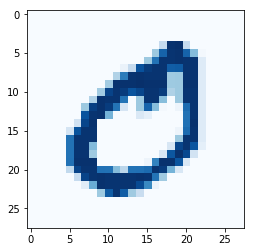

In [3]:
plt.imshow(X[1].reshape((28,28)), cmap='Blues')

## Model Building

Since there was not much Data manipulation need for this dataset, there will be a more significant emphasis placed in the different methods and models portion. This part will break up into the following sections:
* PCA
* T-SNE
* K-means
* Hierarchical Clustering

### PCA (Principal Component Analysis)

Use PCA to reduce the dimensionality

a. How many components did you use? Why?

b. Plot the first two components. Do you notice any trends? What is this plot showing us?

c. Why would you use PCA? What is it doing? And what are the drawbacks?

d. Plot some of the images, then compress them using PCA and plot again. How does it look?

a. How many components did you use? Why?

We see from below how our explained ratio increases to 100 percent as we continue to add more principal components. We also see an elbow in our graph at ~155 components. Thus, one option would be to use 150 components when reducing the dimensionality since the rate of reduction in variance decreases after that. Another option would be to use the number of components necessary to reach a certain amount of explained variance. That is at 153 components, according to our code below.

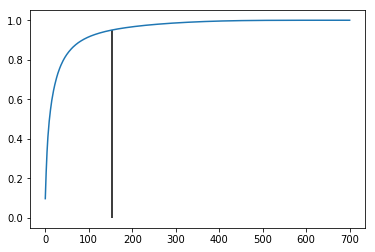

In [4]:
pca = PCA(n_components=701)
X_pca = pca.fit_transform(X)
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
plt.plot(range(len(cum_ratio)), cum_ratio)
plt.vlines(ymin=0,ymax=cum_ratio[153],x=153)

In [5]:
cum_ratio = np.cumsum(pca.explained_variance_ratio_)
index_95 = np.argmax(cum_ratio >= 0.95)
print(index_95)
print(cum_ratio[index_95])

153
0.950349970208


In [6]:
pca = PCA(n_components=0.95)
X_pca = pca.fit_transform(X)
print(X_pca.shape)

(70000, 154)


In [7]:
print(X_pca.shape)

(70000, 154)


b. Plot the first two components. Do you notice any trends? What is this plot showing us?
What we see from the plot below is that as the number deviates from 0, it spreads in all different directions, it shows the density of the plot and the many similarities shared by those points and how they are affecting each other and how they are being pulled away, but you are able to see 3 main clusters where there is a lot of overlap accross numbers.

Text(0.5,1,'PC1 vs. PC2')

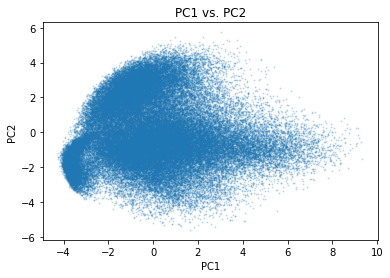

In [8]:

pca = PCA(n_components=2)
pca.fit(X)
transform = pca.transform(X)
plt.scatter(transform[:,0],transform[:,1], s=1,alpha=0.2)
clim(0,9)
xlabel("PC1")
ylabel("PC2")
plt.title("PC1 vs. PC2")

Why would you use PCA? What is it doing? And what are the drawbacks?

PCA is a technique that projects our data onto the axes with the highest variance. The idea being that it is the least information lost. Thus, the first principal component is the axis that preserves the most variance, the second principal component is the one orthogonal to the first that preserves the next most amount of variance.

Some of the drawbacks is that when you use PCA you are prone to lose some information still at the benefit of reducing your dimensionality. On top of that, if the data has homoskedasticity there will be no "good" principal or second component, since the variance will be equallyt disgributed and therefore there is not much information to be gained from the distribution of the variance. This is hardly the case, however this is something to look out for.

d. Plot some of the images, then compress them using PCA and plot again. How does it look?

In [9]:
pca = PCA(n_components=2).fit(X)
transform = pca.transform(X)

(70000, 784)


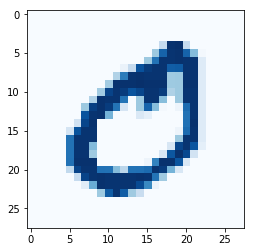

In [10]:
temp = pca.inverse_transform(transform) 
print (temp.shape)
plt.imshow(temp[1].reshape((28,28)), cmap='Blues')
plt.imshow(X[1].reshape((28,28)), cmap='Blues')

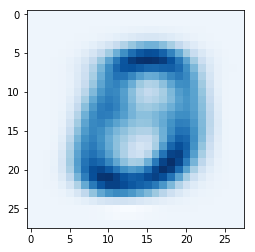

In [42]:
#Blury
plt.imshow(temp[1].reshape((28,28)), cmap='Blues')

## T-SNE

Use t-SNE to plot the first two components (you should probably random sample around 10000 points):


a. How does this plot differ from your PCA plot?

b. How robust is it to changes in perplexity?


c. How robust is it to different learning rate and number of iterations?

In [12]:
#first reduce dimensionality before feeding to t-sne
mnist = fetch_mldata("MNIST original")
X = mnist.data / 255.0
y = mnist.target
pca = PCA(n_components=50)
X_pca = pca.fit_transform(X)
rows = np.arange(70000)
np.random.shuffle(rows)
n_select = 10000
tsne = TSNE(n_components=2, verbose=1, perplexity=50, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 11.330s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.922246
[t-SNE] KL divergence after 250 iterations with early exaggeration: 83.041183
[t-SNE] Error after 1000 iterations: 1.657669


In [13]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]

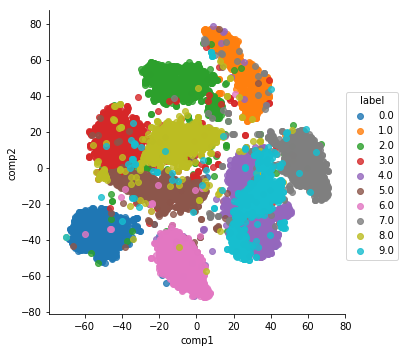

In [14]:
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [17]:
tsne = TSNE(n_components=2, verbose=1, perplexity=30, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 91 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.033s...
[t-SNE] Computed neighbors for 10000 samples in 10.460s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.737848
[t-SNE] KL divergence after 250 iterations with early exaggeration: 86.925682
[t-SNE] Error after 1000 iterations: 1.761537


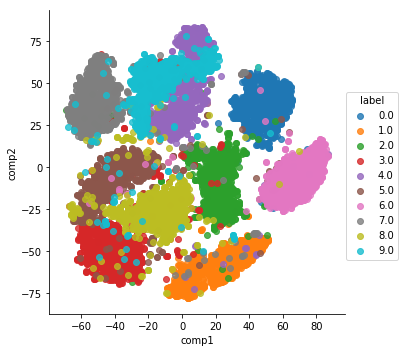

In [18]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [19]:
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.022s...
[t-SNE] Computed neighbors for 10000 samples in 8.707s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.103256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.555489
[t-SNE] Error after 1000 iterations: 1.930690


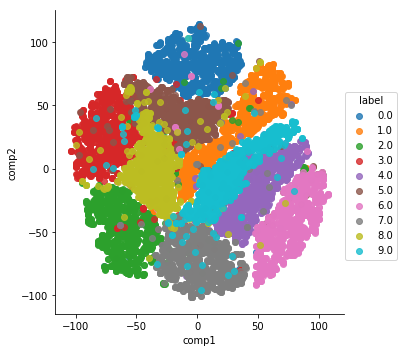

In [20]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [21]:
#Robust check for number of iterations and learning rate.
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000, learning_rate=200)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 8.578s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.103256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.120087
[t-SNE] Error after 5000 iterations: 1.574036


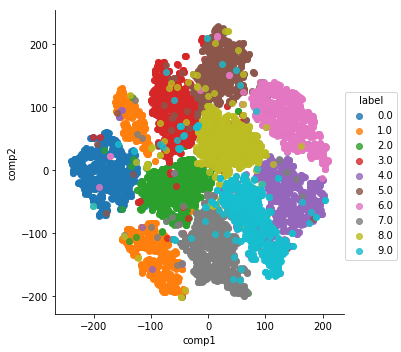

In [22]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [43]:
#Robust check for number of iterations and learning rate.
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=5000, learning_rate=2000)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.034s...
[t-SNE] Computed neighbors for 10000 samples in 8.736s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.103256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.006203
[t-SNE] Error after 5000 iterations: 1.533113


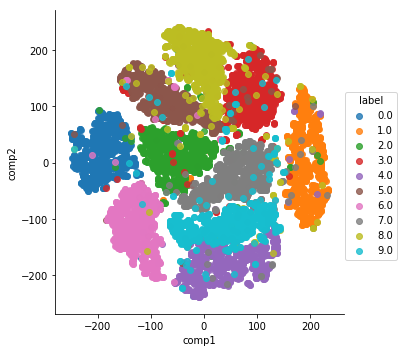

In [44]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [52]:
#Robust check for number of iterations and learning rate.
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=500, learning_rate=2000)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.023s...
[t-SNE] Computed neighbors for 10000 samples in 8.849s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.103256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 98.683502
[t-SNE] Error after 500 iterations: 2.338964


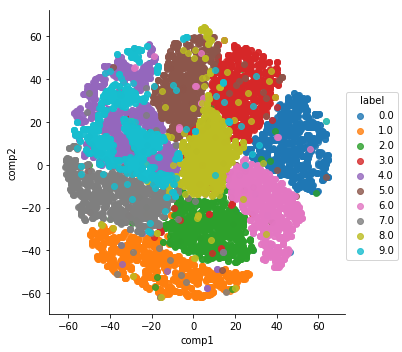

In [53]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

In [54]:
#Robust check for number of iterations and learning rate.
tsne = TSNE(n_components=2, verbose=1, perplexity=5, n_iter=1000, learning_rate=400)
tsne_results = tsne.fit_transform(X_pca[rows[:n_select],:])

[t-SNE] Computing 16 nearest neighbors...
[t-SNE] Indexed 10000 samples in 0.022s...
[t-SNE] Computed neighbors for 10000 samples in 8.754s...
[t-SNE] Computed conditional probabilities for sample 1000 / 10000
[t-SNE] Computed conditional probabilities for sample 2000 / 10000
[t-SNE] Computed conditional probabilities for sample 3000 / 10000
[t-SNE] Computed conditional probabilities for sample 4000 / 10000
[t-SNE] Computed conditional probabilities for sample 5000 / 10000
[t-SNE] Computed conditional probabilities for sample 6000 / 10000
[t-SNE] Computed conditional probabilities for sample 7000 / 10000
[t-SNE] Computed conditional probabilities for sample 8000 / 10000
[t-SNE] Computed conditional probabilities for sample 9000 / 10000
[t-SNE] Computed conditional probabilities for sample 10000 / 10000
[t-SNE] Mean sigma: 1.103256
[t-SNE] KL divergence after 250 iterations with early exaggeration: 95.188431
[t-SNE] Error after 1000 iterations: 1.903005


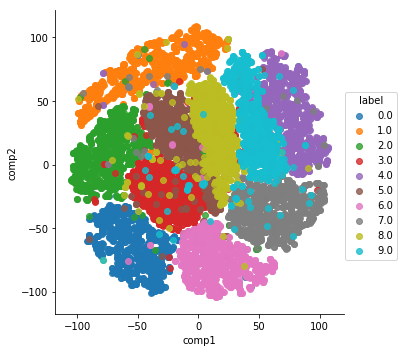

In [55]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

a. How does this plot differ from your PCA plot?

It is different in that there are specific labels for each one of the numbers as they have been clustered, this makes it even more evident about the crossover across numbers.. it is important to note that this relationships are very intuitive for the computer, but not so much for a trained human eye. Example of this is how 4-9 are sharing the same cloud, (circle looking figure on top with a stick pointing down.

b. How robust is it to changes in perplexity (inability to deal with or understand something complicated or unaccountable)?

Perplexity is a second feature of t-SNE is a tuneable parameter, “perplexity,” which says how to balance attention between local and global aspects of your data. The parameter is, in a sense, a guess about the number of close neighbors each point has. The perplexity value has a complex effect on the resulting pictures. The original paper says, “The performance of SNE is fairly robust to changes in the perplexity, and typical values are between 5 and 50.” But the story is more nuanced than that. Getting the most from t-SNE may mean analyzing multiple plots with different perplexities. After making 3 different plots, we see that the "sweet spot" for the perplexity turned out to be 5. Somewhat of an uncommon number, which goes to show that in choose=ing and tunning the hyperparameter it is important to try different options even though it might be somewhat time consuming and might not seem to be the best idea.


c. How robust is it to different learning rate and number of iterations?

Learning Rate: The learning rate makes a huge difference, not only in the positioning of the clusters within the map, but also a great impact in how they are distributed and how they are being compacted together as a single cloud.

Number of Iterations: This is crucial, you can see that the clusters are going very wide and you can see that it is not very precise but the higher they are you are a lot more precise and less variance within the clusters.



## K-means clustering

Perform k-means clustering:

a. How did you choose k?

b. How did you evaluate your clustering?

c. Visualize your clusters using t-sne

d. Did you scale your data?

e. How robust is your clustering?

A. How did you choose k?

Using the Elbow method we can see that around 8-12 clusters would be the "Sweet Spot".

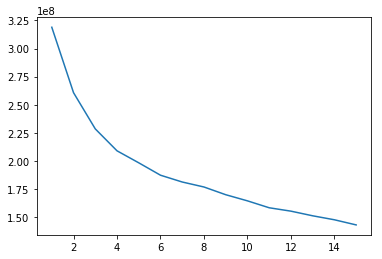

In [16]:
sses = []
for k in range(1,16):
    kmeans = KMeans(n_clusters=k, n_init=50, n_jobs=-1)
    kmeans.fit(X_full)
    sses.append(kmeans.inertia_)
plt.plot(range(1,16), sses)

B. How did you evaluate your clustering?

In order to evaluate the cluster, I used a silhouette score. This is pretty standard, and it has proven to show its effectiveness.

In [24]:
kmeans_model = KMeans(n_clusters=10, n_init=50, n_jobs=-1).fit(X_full)
labels = kmeans_model.labels_
silhouette_score(X_full, labels, metric='euclidean')

0.10814903738628452

C. Visualize your clusters using t-sne

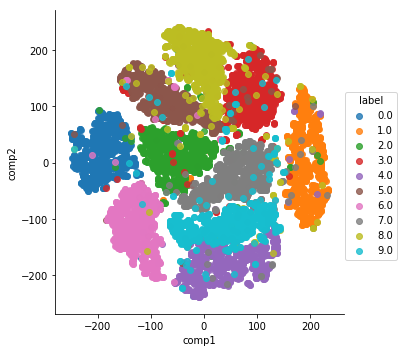

In [48]:
df_tsne = pd.DataFrame(tsne_results, columns=['comp1', 'comp2'])
df_tsne['label'] = y[rows[:n_select]]
sns.lmplot(x='comp1', y='comp2', data=df_tsne, hue='label', fit_reg=False)

d. Did you scale your data?
First of all we need to ask ourselves, Should I scale my data? When does it yield better resultst to yield your data.

Scaling features can be important. This also applies to k-means clustering because we are taking distances between points. If your data have defined distances like lat and long data, then you should not scale as you will distort the distances between points. If, on the other hand, you are clustering on features that are not really comparable, scaling could be a good choice. In practice, it is best to try both and look at the results to see what patterns emerge.

In this case we can see that in the following statement we scaled the data in order to get a better view and make it more manageable.
"mnist.data / 255.0"
This allows the numbers of grayscale to be within 0-1.

E. How robust is your clustering?

Small changes in data can lead to large changes in clustering, so useful to perform the clustering on many subsets of data to test robustness. In this case, given that the data is well distributed and that some of the numbers are very different several clusters won't be affected, but others might take a bigger hit and not do as well as expected with the change in data or by increasing the number of pixels being turned on.

## Hierarchical Clustering

Perform hierarchical clustering:

a. Plot your dendrogram

b. How many clusters seem reasonable based off your graph?

c. How does your dendrogram change with different linkage methods?

A. Plot your dendrogram

B. How many clusters seem reasonable based off your graph?

Depends on the graph.. I would say (kind of counterintuitive knowing that there are should be 10 custers) that it should be 7 or 6 different clusters. This, however, is understandable since there are various numbers that look like each other.

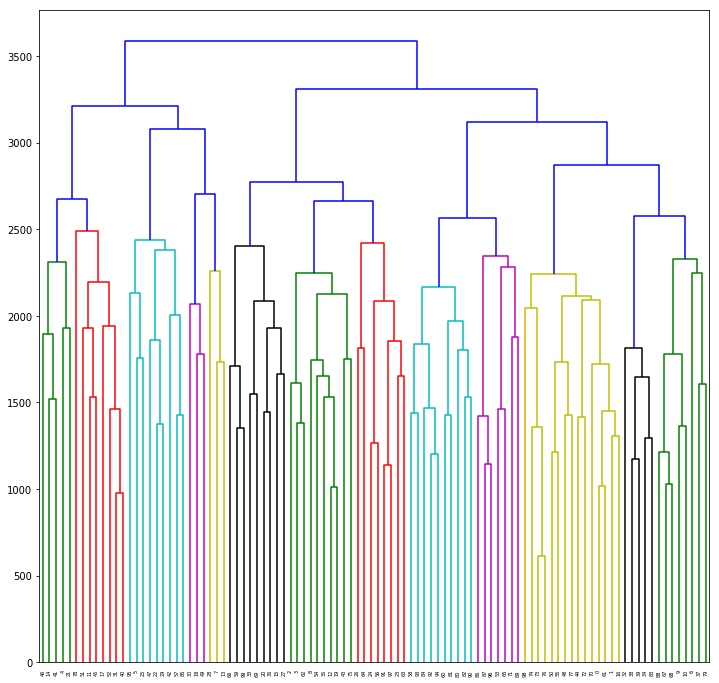

In [56]:
Z = linkage(X_full, 'complete')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

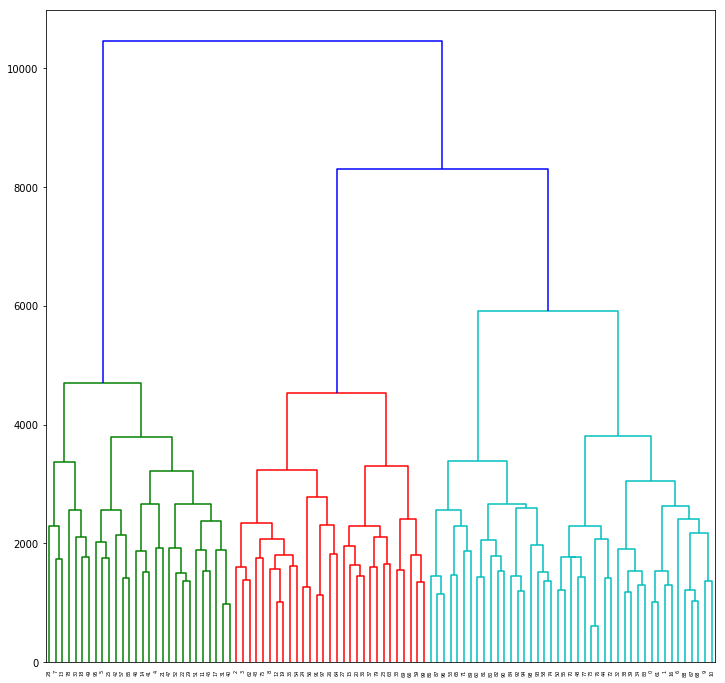

In [57]:
Z = linkage(X_full, 'ward')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

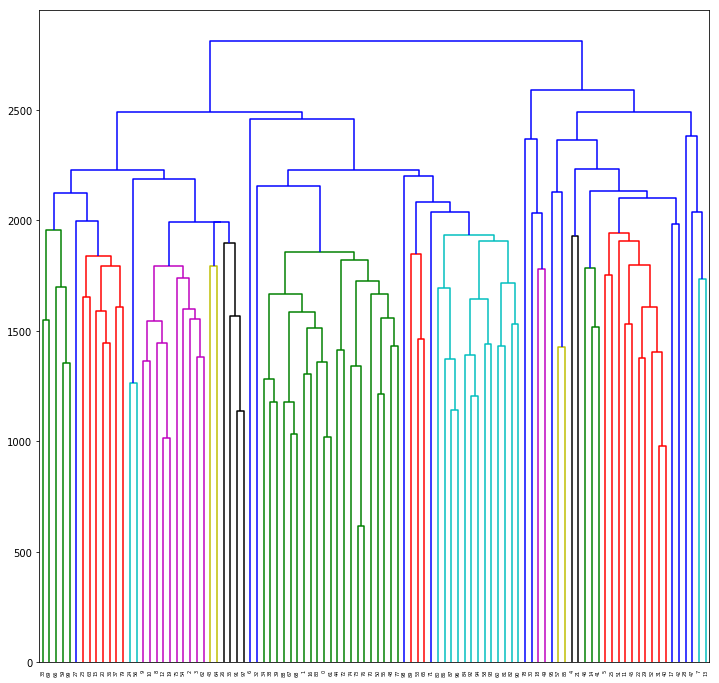

In [58]:
Z = linkage(X_full, 'average')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

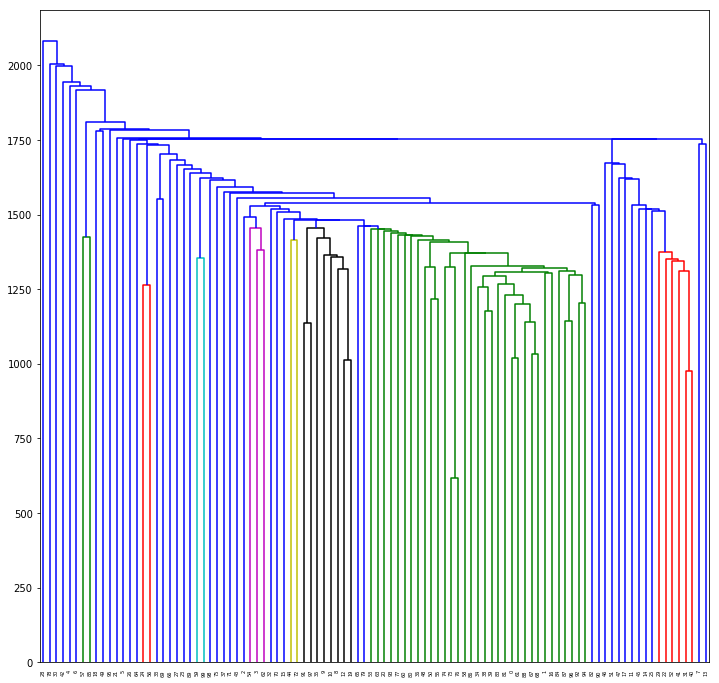

In [59]:
Z = linkage(X_full, 'single')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

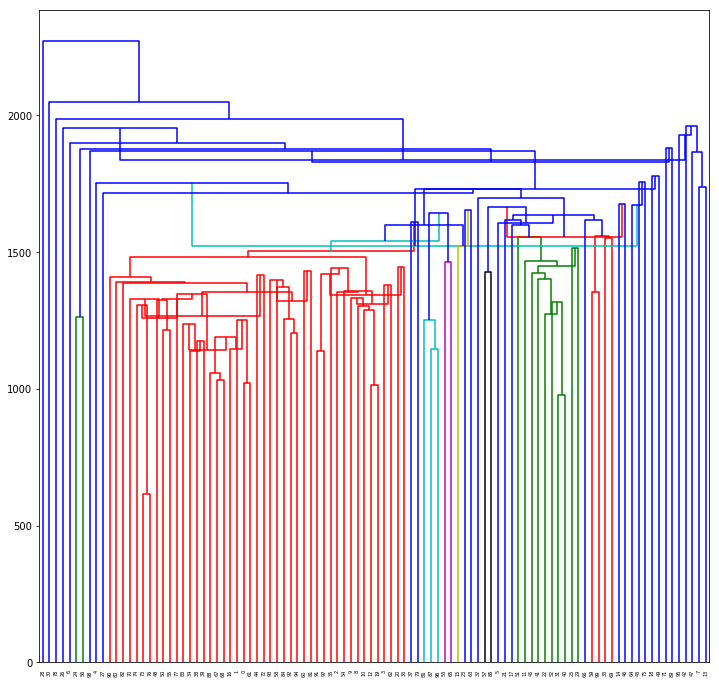

In [60]:
Z = linkage(X_full, 'centroid')
plt.figure(figsize=(12, 12))
_ = dendrogram(Z)

c. How does your dendrogram change with different linkage methods?

There are 2 main things that change with the chosen linkeage methods. The number of branches and how high up they are starting to show up. complete shows that there are very very orderly, while centroid and single seem a lot messier and a lot intuitive how the clusters are interacting with each other.